**If you are reading our tutorial in a jupyter notebook, you can click [here](https://tjroginsky.github.io/CMPS-3660-Tutorial/) to view this notebook online.**


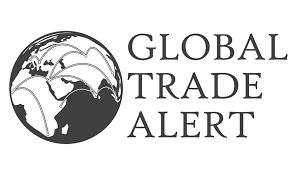

## An Overview of Protectionist Policies and Behavior Among the G20: An Analysis Since 2009

Thomas Roginsky and Dinuka Malith Don Nakandalage

Final Data Science Tutorial - CMPS 3660-02 - Introduction to Data Science - Professor Mattei

### 1. Introduction 

#### Brief Summary
During the Washington DC summit in 2008, the G-20 countries gathered together and pledged to end protectionism, which is any action taken by countries to protect domestic industries from foreign commericial interests through tax or non-tax measures. After years of fall-outs since the failed Doha Development Round, this pledge by some of the largest trading nations and blocs showed signs of progress towards a more free and open world.

However, over the past years, it has been quite evident that sentiments across the world on trade and the perceived effects on the domestic economy have turned negative. The rise of nationalist sentiment across key trading nations like the United States, Britain, and Brazil has seemed to indicate that the promise made nearly 10 years ago by the key trading bloc is now under serious threat. 

For our project, we look to explore use data science tools to take an analytical approach in tracking how the ten year pledge has worked out over the past decade. Specifically, we'll be looking to track how the G-20 nations and the rest of the world have progressed in trade in relation to the promise made ten years ago, which countries and regions have turned their back on their promise the most, and against whom they have turned. Finally, we'll look to use the machine learning techniques we have learned in class to predict how long trade measures last, and how proctectionist/open one country is against another.

Despite large progress on promoting the global economy and raising free, global trade as one of the key flagpoles of economic development in the 21st Century, economic relationships seem to have ebbed and flowed has political ideologies change. This analysis will be useful in putting into context key political waves and how they've affected bilateral trade relationships and to what extent. As Economics majors, believe this project will be useful in pursuing our interests to merge the fields of Data Science and Economics to advance better insights and analysis. 

#### Data Source

An interesting dataset we came across was one posted by Global Trade Alert, an initiative by the Center for Policy Research which provides full coverage of the trade-discriminatory measures all across the globe (link found [here](https://www.globaltradealert.org/data_extraction)).
   
The dataset provided by Global Trade Alert gives tons of information that helps us to answer these question we posed earlier. Starting from 2008, the dataset contains data of all the trade measures announced and implemented. It is extremely comprehensive, with information on which country implemented a measure, who they implemented it on, on what sectors, when it was announced and removed, and so on. A nifty feature the GTA adds on is that they evaluate every single trade measure implemented through three unique “color” indicators - red classifying those which certainty discriminate against foreign commercial interests, yellow which could potential deter foreign commercial interests, and green which pertains to more liberalizing (i.e. anti-trade) measures. 
    
This data set is collected from 2008 to 2018. The Center for Policy Research adopts quite a rigourous method to ensure the data is verified and updated routinely. This involves routine third-party checks and continous reviews on the state acts implemented. For more information on the data and how it is collected please visit the website Global Trade Alert ([here](https://www.globaltradealert.org/about)). We decided to utilize the entire dataset for this project, and downloaded the dataset in excel format. As one would expect, trade measures are implemented on a very common basis. Add to that a 150+ countries records on how they behaved over the past ten years gives us an extremely large dataset. This dataset, while useful and informational in data supply, slows our performance a little, given the amount of data we have to process and run through. 

There are few limitations in addition the size of the data. First, is the lack of any continous variables to perform our analysis. Most of the information contained are in object, string or dateform, with none are quantitative variables for us to work with. Additionally, the lack of important quantitative variables like for example, the potential value or amount of a particular measure, makes our a analysis in measuring the effects of trade on the G-20 relatively difficult. In this project, we mostly deal with the number of trade measures (as opposed to value) to see how the G-20 countries have been behaving. The quantity of trade measures may not accurately reflect how liberal/protectinist a country is in the trading environment, as perhaps quantity of measures implemented is a reflection of how often these products/services are traded on the international market. What helps us greatly however, is the GTA evaluation of the trade measures introduced, which allow us to see the severity of the trade measures and how they've evolved over time.

### 2. Data Extraction, Transform, and Loading

For this project, we will be working with the pandas, matplotlib, scikit, and other libraries to help our analysis. We'll be installing and importing the necessary libraries.

In [1]:
!pip install pycountry
!pip install pycountry-convert
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import pycountry_convert as pcc
import numpy as np
!python3 -m pip install lxml
from bs4 import BeautifulSoup
import requests as rq
import seaborn as sns
!pip install geopandas
import geopandas
!pip install descartes
import descartes
import warnings
pd.options.mode.chained_assignment = None

Fortunately, the data we worked was quite easy to load and already met many of the principles key of the tidy data. However, we wanted transform our variables to help us with visualizations and also with our calculations. First, we looked for variables that needed transformation in their dtypes. Most of the data except for Inception Date, Announcement Date, and Removal Date were in the type we wanted. Similar to Project 1, we converted these variables to datetime format.

Taking a brief look at our data, we see most of is organized quite well and according to the tidy data format. So asides from the variable transformations there wasn't much else to do. 

In [2]:
df_trade = pd.read_excel("GTA_all_data.xlsx")
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaN,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain


A quick look at our dtypes, since there are no numerical variables asides from State and Intervention ID, most of them were in a data type which were in acceptable format. But as mentioned earlier, we looked to change the dates to a date time format to help us filtering and extracting data, which we'll need later for our analysis. 

In [3]:
df_trade.dtypes

State Act ID                  int64
Intervention ID               int64
State Act Title              object
Announcement Date            object
GTA Evaluation               object
Currently in force           object
Inception Date               object
Removal Date                 object
Implementing Jurisdiction    object
Intervention Type            object
MAST chapter                 object
Affected Sectors             object
Affected Products            object
Affected Jurisdiction        object
dtype: object

In [4]:
df_trade['Inception Date'] =  pd.to_datetime(df_trade['Inception Date'])
df_trade['Announcement Date'] =  pd.to_datetime(df_trade['Announcement Date'])
df_trade['Removal Date'] =  pd.to_datetime(df_trade['Removal Date'])

We renamed our columns as well to make it more readable for ourselves and our readers.

In [5]:
df_trade.columns = ['State Act ID', 'Intervention ID', 'State Act Title',
       'Announcement Date', 'GTA_Evaluation', 'Currently in force',
       'Inception Date', 'Removal Date', 'Implementing Jurisdiction',
       'Intervention Type', 'MAST chapter', 'Affected Sectors',
       'Affected Products', 'Affected Jurisdiction']

### Data Scraping

An initial check on the data values sees the sectors and products written in a code format. To address this we scraped data from the Global Trade Alert website to associate each sectorID with a sector. We plan on using this to better understand how trade affect different sectors, as each act in out primary dataset has a list of affected sectors associated with it. The data was scraped from [this](https://www.globaltradealert.org/sectors) page.

In [6]:
r = rq.get('https://www.globaltradealert.org/sectors')
bisque = BeautifulSoup(r.text, 'html.parser')
crabby = bisque.prettify()
sector_lists = bisque.find("ul", class_="list-unstyled sector_search")
bisque.find("ul", class_="list-unstyled sector_search")

sector_li = sector_lists.find_all("li")
sector_li

sectorIDs = []
sectorNames = []

for i in range(0, 329):
    sectorIDs.append(sector_li[i]['id'][7:])
    sectorNames.append(sector_li[i]['name'])
    
sector_df = pd.DataFrame({'sectorID': sectorIDs, 'sector': sectorNames})

### 3. Exploratory Data Analysis

#### Summary Statistics

We don't have a lot of quantitative variables to analyse, but we have an important categorical variable in GTA Evaluation, which measures how liberal/restrictive a trade measure has been. According to the GTA, green labeled interventions are trade liberalising, red as harmful, and amber categorized as those that have strong chance of being harmful to trade prospects or trade discrimnatory. Over the time period after the recession from 2008 throught 2018 the trade environment has been somewhat bleak. Over a half of the measures implemented during this 10 year period are categorized as red, while only 35% of have been trade liberalising. The below cell shows the proportion of Red, Green, and Amber measures throughout the ten years. This gives an indicaton that trade measures, after the pledge made ten years by the G-20, have not really produced results to align with it.


In [7]:
gta_counts = df_trade["GTA_Evaluation"].value_counts()
gta_counts/gta_counts.sum()

Red      0.574244
Green    0.344987
Amber    0.080769
Name: GTA_Evaluation, dtype: float64

### Graph 1 : A Visual Analysis of the Trade Measures Over Time

We first wanted to do see how the GTA evaluation of trade measures have changed over time since inception. The code and graph below shows the trend of the evaluations. It's quite interesting to see a small dip in the protectionist trends post 2015, not matching up to the highs seen during the mid-2010s. The red portion of the graphs seems to have increased steadily over time, sharing a greater half of the three evaluations by 2018.

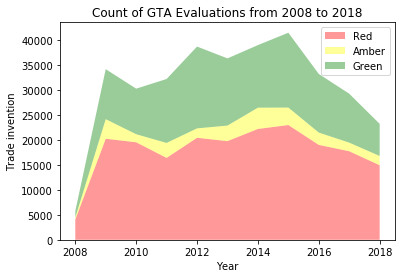

In [8]:
df_trade["announcement_year"] = df_trade["Announcement Date"].dt.strftime("%Y")
df_trade["announcement_year"] =  pd.to_numeric(df_trade["announcement_year"])
df_trade_after_2007 = df_trade[df_trade["announcement_year"] >= 2008]
year_gta_pivot = (df_trade_after_2007.groupby(["announcement_year", "GTA_Evaluation"]).GTA_Evaluation)
green = year_gta_pivot.count().unstack(["GTA_Evaluation"])['Green']
amber = year_gta_pivot.count().unstack(["GTA_Evaluation"])['Amber']
red = year_gta_pivot.count().unstack(["GTA_Evaluation"])['Red']

x_axis = year_gta_pivot.count().unstack(["GTA_Evaluation"]).index.tolist()
y_axis =[red, amber, green]
 
pal = ["red", "yellow", "green"]
plt.stackplot(x_axis, y_axis, labels=['Red','Amber','Green'], colors=pal, alpha=0.4)
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Trade invention')
plt.title('Count of GTA Evaluations from 2008 to 2018')
plt.show()


### Graph 2 : Trends of Intervention Type Over Time

A key variable to our project is the Intervention Type. This data consists of all types of trade measures that have been implemented since 2008. Unfortunately, there are way too many categories that make it difficult to conduct our analysis and visualization. To fix this, we thought it would be easier to categorize into two main buckets: Import Tariff and Non-Tariff Measure. To do this, we first created a variable "mask" that returns True if the Intervention is Import Tariff and Non-Tariff otherwise. We then used our mask variable to map this onto our new variable in the data "Trade Measure Type." Using this new variable, we now only had two categories to work with, and made it much simpler to do a small visualization on how these two measures have evolved over time. 

In [9]:
df_trade["mask"] = (df_trade["Intervention Type"] == "Import tariff") | (df_trade["Intervention Type"] == "Import tariff quota")

In [10]:
df_trade["Trade Measure Type"] = df_trade["mask"].map({
    True : "Tariff",
    False : "Non-Tariff",
})

df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,announcement_year,mask,Trade Measure Type
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,2008,True,Tariff
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,2008,True,Tariff
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,2008,True,Tariff
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,2008,True,Tariff
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,2009,False,Non-Tariff


In [11]:
df_trade["announcement_year"] = df_trade["Announcement Date"].dt.strftime("%Y")

In [12]:
df_trade["announcement_year"] =  pd.to_numeric(df_trade["announcement_year"])
year_tmes_df = df_trade.groupby("announcement_year")["Trade Measure Type"].value_counts().to_frame()


In [13]:
non_tariff = []
tariff = []
for i in range(1, 23):
    if i % 2 == 0:
        tariff.append(year_tmes_df['Trade Measure Type'][i])
    else:
        non_tariff.append(year_tmes_df['Trade Measure Type'][i])
        
years = []
for i in range(2008, 2019):
    years.append(i)
data = {
    'years': years, 
    'non_tariff': non_tariff, 
    'tariff': tariff }
tar_line_df = pd.DataFrame(data)

Text(0.5, 1.0, 'Trade Measures from 2008 throught 2018')

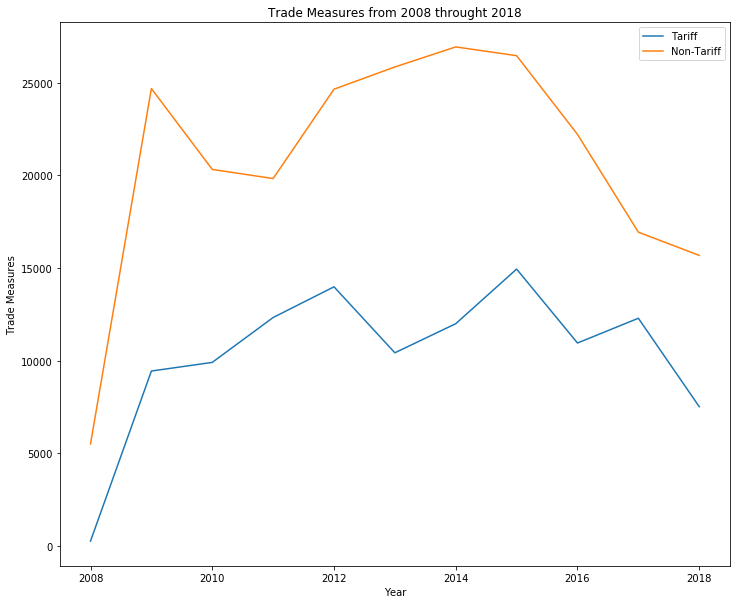

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

ax.plot(tar_line_df['years'], tar_line_df['tariff'], label='Tariff')
ax.plot(tar_line_df['years'], tar_line_df['non_tariff'], label='Non-Tariff')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Trade Measures')
ax.set_title('Trade Measures from 2008 throught 2018')

We noticed two things in our analysis. First, there's a strong relationship between both Non-Tariff and Tariff Measures up until 2012. The positive relationship between break off and then resume after 2015. Additionally, looking at the data after 2016, both the tariff and non-tariff barriers have comparatively reduced, which seems a bit unusual considering the heightened trade tensions between some of the biggest economies like the United States and China.

### Graph 3 : Which Region Has Been the Most Active in terms of Implementing Trade Measures?

Our third chart involves brief analysis of which regions implements these trade measures the most. We decided to construct a pie chart analysis to see who's been the most active in this area. Quite interestingly, Europe and Asia are the two most active, followed by North America. Europe is the largest trading bloc in world, so it's no surpise to us that they are among the most active in implementing trade measures. Asia coming in second is interesting as it is perhaps attributed to the fact that is quite a large region in terms of population, but could also be explained by the large shifts in trade sentiment following the 2008 recession. 

Before we proceed, we recognized that our jurisdictions were broken by country, not continent. So our first job was to address this before we went along with our pie-chart analysis.
Here we used a library called [pycountry_convert](https://pypi.org/project/pycountry-convert/) to match each country to its continent. About 10 of the countries names were slightly different in out dataset than they are in the pycountry_convert library, so we had to change them to use the library.

In [15]:
df_trade["Implementing Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines"}, 
                                              inplace=True)

df_trade["Affected Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis", "U.S.": "United States of America",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines",}, 
                                              inplace=True)



In [16]:
df_trade['impl_continent'] = df_trade["Implementing Jurisdiction"].apply(lambda x: 
                                            pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))

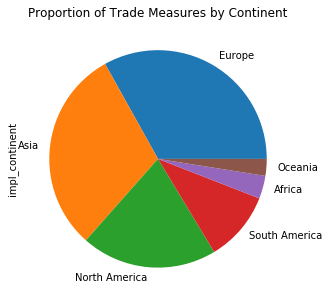

In [17]:
trade_region= df_trade.impl_continent.value_counts()
trade_region.plot.pie(title='Proportion of Trade Measures by Continent', 
                      labels=["Europe", "Asia", "North America", "South America", "Africa", "Oceania"],figsize = (5,5))




### Graph 4 : An Analysis of Sectors - Most Common and Time Trends

Here we wanted to see how the sectors were broken up by GTA evaluation. Before we proceeded, we broke down the datasets into ones with red only and green only. Then, we then used the sectors dataframe to match the sector codes to the actual names. The sector names are quite specific, and there could potentially be names that are under the same sector group but vary by the stage of production that sector is in. For example, Iron/Steel Products and Basic Iron and Steel are the same, but are at two different stages (one being finished goods and the other being at raw, unrefined). 

***Plot A: Sectors with the Most Common "Red" Measures***

In [18]:
df_red = df_trade.loc[df_trade['GTA_Evaluation'].isin(['Red','Yellow'])]
df_green = df_trade.loc[df_trade['GTA_Evaluation'].isin(['Green'])]

In [19]:
df_red['sector_string'] = df_red['Affected Sectors']
df_green['sector_string'] = df_green['Affected Sectors']

In [20]:
def make_string(x):
    if type(x) is not str:
        return str(x)
    else:
        return x
        
# here we make sure sector_string is indeed a string    
df_red["sector_string"] = df_red["sector_string"].apply(make_string)
df_green["sector_string"] = df_green["sector_string"].apply(make_string)

In [21]:
df_red['sector_list'] = df_red['sector_string'].str.split(",")
pd.DataFrame(df_red['sector_list']).stack()
sector_df['IDstring'] = sector_df['sectorID'].apply(make_string)
sector_string_list = sector_df['IDstring'].to_list()

In this loop we create a boolian variable for every sector in sector_string_list. This allows us to know for each measure what sectors are affected. This is a distinctly untidy approach, but we found it to be better than the alternative having an observation listed for each sector that a trade measure was applied to. Our machine learning models further on performed better with this format.

In [22]:
for sector in sector_string_list:
    df_red[sector] = df_red['sector_string'].str.contains(pat=sector)
    df_green[sector] = df_green['sector_string'].str.contains(pat=sector)

In [23]:
# here we are adding up the number of red trade measures in each sector
sector_sums = []
for sector in sector_string_list:
    sector_sums.append(df_red[sector].sum())

In [24]:
sector_df['measure_count'] = sector_sums
sector_df['proportion_of_sectors'] = sector_df['measure_count'] / sector_df['measure_count'].sum()

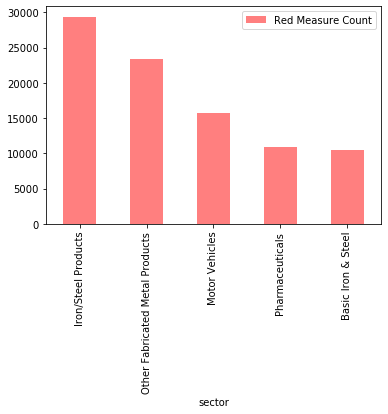

In [25]:
sector_df.sort_values(by="measure_count",ascending = False).head(10)
x = sector_df.sort_values(by="measure_count",ascending = False).head(5).plot.bar(y = "measure_count",color ="red",alpha = 0.5,x = "sector")
x.set_xticklabels( ('Iron/Steel Products', 'Other Fabricated Metal Products','Motor Vehicles','Pharmaceuticals','Basic Iron & Steel'))
x.legend(["Red Measure Count"])

A couple of interesting things here to consider. Due to the onset of the trade war between USA and China, it isn't surprising to see Iron/Steel Products and related products take the top place as the sectors with the most red trade measures over the past 10 years. Along with that, we see Motor Vehicles, and more interestingly Pharmaceutical Products. Trade restrictions on pharmaceuticals do make sense, however. Most countries would want to establish a strong healthcare sector without having to rely on other countries strength in products to do so. Thus, to protect them usually countries would implement a spur of trade measures to help infant industries or smaller businesses grow their product speciality and offerings. Overall however, the key takeaway from this message is that post 2009, the trade discrimnatory trade measures have been dominated by nearly one sector overall, and that is the Steel & Iron Industry. 

***Plot B: Sectors with the Most Common "Green" Measures***

In [26]:
# here we are adding up the number of green trade measures in each sector
sector_sums = []
for sector in sector_string_list:
    sector_sums.append(df_green[sector].sum())

In [27]:
sector_df['proportion_of_sectors'] = sector_df['measure_count'] / sector_df['measure_count'].sum()

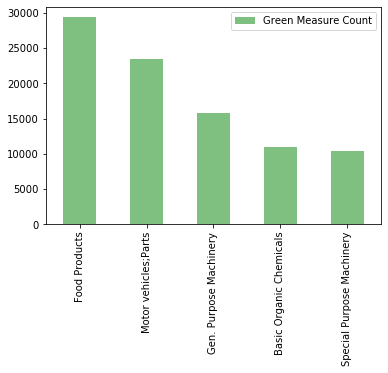

In [28]:
y = sector_df.sort_values(by="measure_count",ascending = False).head(5).plot.bar(y='measure_count',color = "green",alpha = 0.5)
y.set_xticklabels( ('Food Products', 'Motor vehicles;Parts','Gen. Purpose Machinery','Basic Organic Chemicals','Special Purpose Machinery','Pumps, Compressors, and Hydrualis'
                    ,'Pumps,compessors,hydraulics','Vegetable oils','Instruments & Control Equipment','Electric Motors','Prepared & Preserved Fish'))
y.legend(["Green Measure Count"])

This breakdown is very different compared to the earlier one, and a lot more diverse. Food Products standard as one of the most open/liberalising sectors with nearly 30,000 green trade measures implemented over the past 10 years. This followed shortly but Motor Vehicle Parts, which are the components to make up the finished products. Interestingly enough, the parts to make motor vehicles have been more open and liberalising, yet the finished products as seen earlier are more protectionist. This falls in line with recent trends we've observed over the past few years. The trade world has become more interconnected, due to the growth of global value chains. This is where parts of goods will be made by different countries who specialize in them, and they are shipped to other countries for assembly. Other than that, we see basic organic chemicals, special purpose machiney - mostly used for automated assembly. Overall, we see quite a diverse list, not as focused on a sector as the "red" trade measures.

### Graph 5: How Have the Top 5 Protected Sectors Changed Over Time?

We wanted to see whether the top 5 products move in tandem, or whether there are individual sectors that vary from time to time randomly. We expect the US-Sino war which began around 2016 to heighten the trade measures in Steel/Iron related sector. Here we match the sector codes of the top 5 product sectors found earlier and group them by year to analyse how they've changed over time.

In [29]:
df_trade_model = df_trade
df_trade_model['sector_string'] = df_trade_model['Affected Sectors']
df_trade_model["sector_string"] = df_trade_model["sector_string"].apply(make_string)
for sector in sector_string_list:
    df_trade_model[sector] = df_trade_model['sector_string'].str.contains(pat=sector)

In [30]:
searchfor = ['239', '491','439','341','449']
temp_df = df_trade_model[df_trade_model["Affected Sectors"].str.contains('|'.join(searchfor),na = False)]

In [31]:
temp_df['year'] = temp_df['Announcement Date'].dt.strftime("%Y")

Text(0, 0.5, 'Total Red Measures')

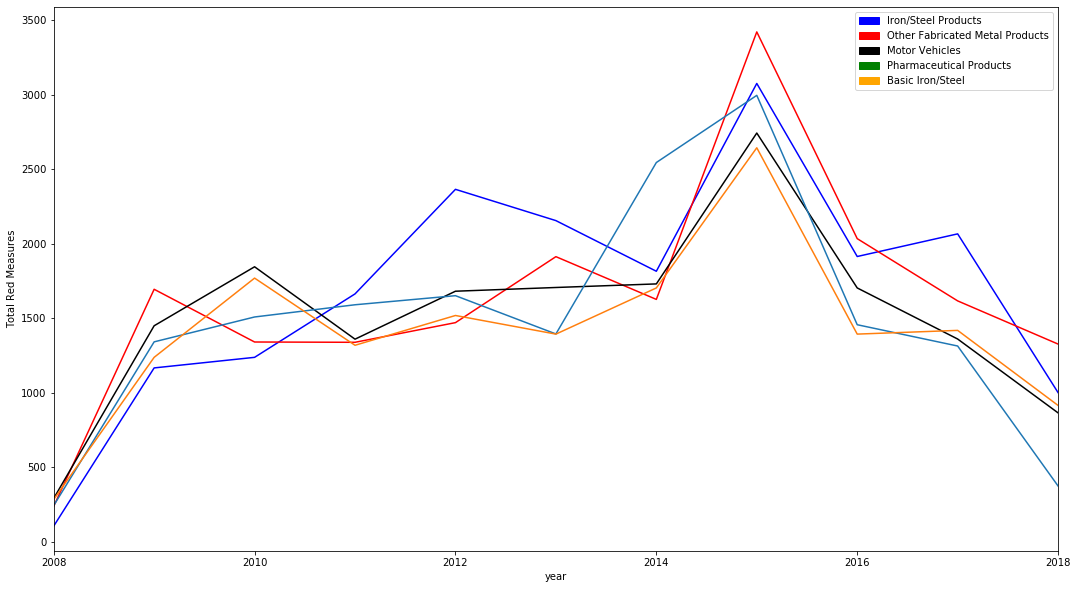

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(18,10))
temp_df.groupby(["year"])["239"].sum().plot.line(ax=ax,color = "blue")
temp_df.groupby(["year"])["491"].sum().plot.line(ax=ax,color = "red")
temp_df.groupby(["year"])["439"].sum().plot.line(ax=ax,color = "black")
temp_df.groupby(["year"])["341"].sum().plot.line(ax=ax)
temp_df.groupby(["year"])["449"].sum().plot.line(ax=ax)


red_patch = mpatches.Patch(color='blue', label='Iron/Steel Products')
blue_patch = mpatches.Patch(color='red', label='Other Fabricated Metal Products')
black_patch = mpatches.Patch(color='black', label='Motor Vehicles')
green_patch = mpatches.Patch(color='green', label='Pharmaceutical Products')
orange_patch = mpatches.Patch(color='orange', label='Basic Iron/Steel')
plt.legend(handles=[red_patch,blue_patch,black_patch,green_patch,orange_patch])
ax.set_ylabel("Total Red Measures")


Here we see a strong correlation between the red trade measures, which perhaps suggest that no single product is targeted during periods of protectionist sentiment. Contrary to initial expectations, trade protectionism was at an all time high in 2014, as opposed to when Trump took office. We do see that in 2017 red trade measures kick up a bit,  in albeit at a lower base level.

### Graph 6: Protectionism Heatmap

With our final few graphs wanted to look at which countries have been most protectionist (i.e. turned their back on their pledge the last 10 years the most). The code and graph belows shows each country but it's proctetionist proportion. In other words, they darker shader they are indicates the more "red" trade measures they implemented during the 10 year period. We first analyse their bilateral relations, and then move to a more general picture to show a countries protectionist behavior.

In [33]:
# List of G20 members
g20_list_new = ['Australia', 'India', 'United Kingdom','France', 'Canada', 'Japan', 
                'Mexico', 'Brazil', 'Italy', 'Germany', 'Indonesia', 'China', 'Argentina', 'Russia',
                'United States of America', 'South Africa', 'Saudi Arabia', 'Korea, Republic of', 'Turkey', 'European Union']

g20_EU = g20_list_new.copy()

# list of EU memebers that are not individually represented in the G20
just_eu = ['Malta', 'Lithuania', 'Slovenia', 'Austria','Finland', 'Netherlands', 'Romania', 'Hungary', 'Slovakia',
           'Sweden', 'Czechia','Belgium', 'Latvia', 'Poland', 'Croatia', 'Greece', 'Denmark', 
           'Bulgaria', 'Estonia', 'Portugal','Cyprus']

g20_EU.extend(just_eu)

In [34]:
# gDF is filtered to just measures between G20 members
gDF = df_trade[df_trade['Implementing Jurisdiction'].isin(g20_EU) & 
                     df_trade['Affected Jurisdiction'].isin(g20_EU)]

In [35]:
# empty dataframe that will be used to create heatmap
matrix_df = pd.DataFrame(index=g20_list_new, columns=g20_list_new)
matrix_df = matrix_df.fillna(0)
gDF = gDF.replace(just_eu, "European Union")

In [36]:
# this function returns the percentage of measure implemenet by one coutnry on another that are discriminatory
def get_perp(impl, affd, in_df):
    temp_df = in_df[(in_df['Implementing Jurisdiction'] == impl) & (in_df['Affected Jurisdiction'] == affd)]
    temp_df['Intervention_ID'] = temp_df['Intervention ID'] 
    gr_df = temp_df[temp_df['GTA_Evaluation'] == "Green"]
    temp = np.nan
    if (len(gr_df) > 0) and (len(temp_df) > 0):
        percent_green = pd.DataFrame(gr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count() / temp_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count())
        percent_green['percent_red'] = 1 - percent_green['Intervention_ID']
        temp = percent_green.loc[impl]['percent_red']
    return temp

In [37]:
# looping through every spot in matrix_df to fill it in
for i in g20_list_new:
    for j in g20_list_new:
        if i != j:
            matrix_df.loc[i, j] = round(get_perp(i, j, gDF),2)

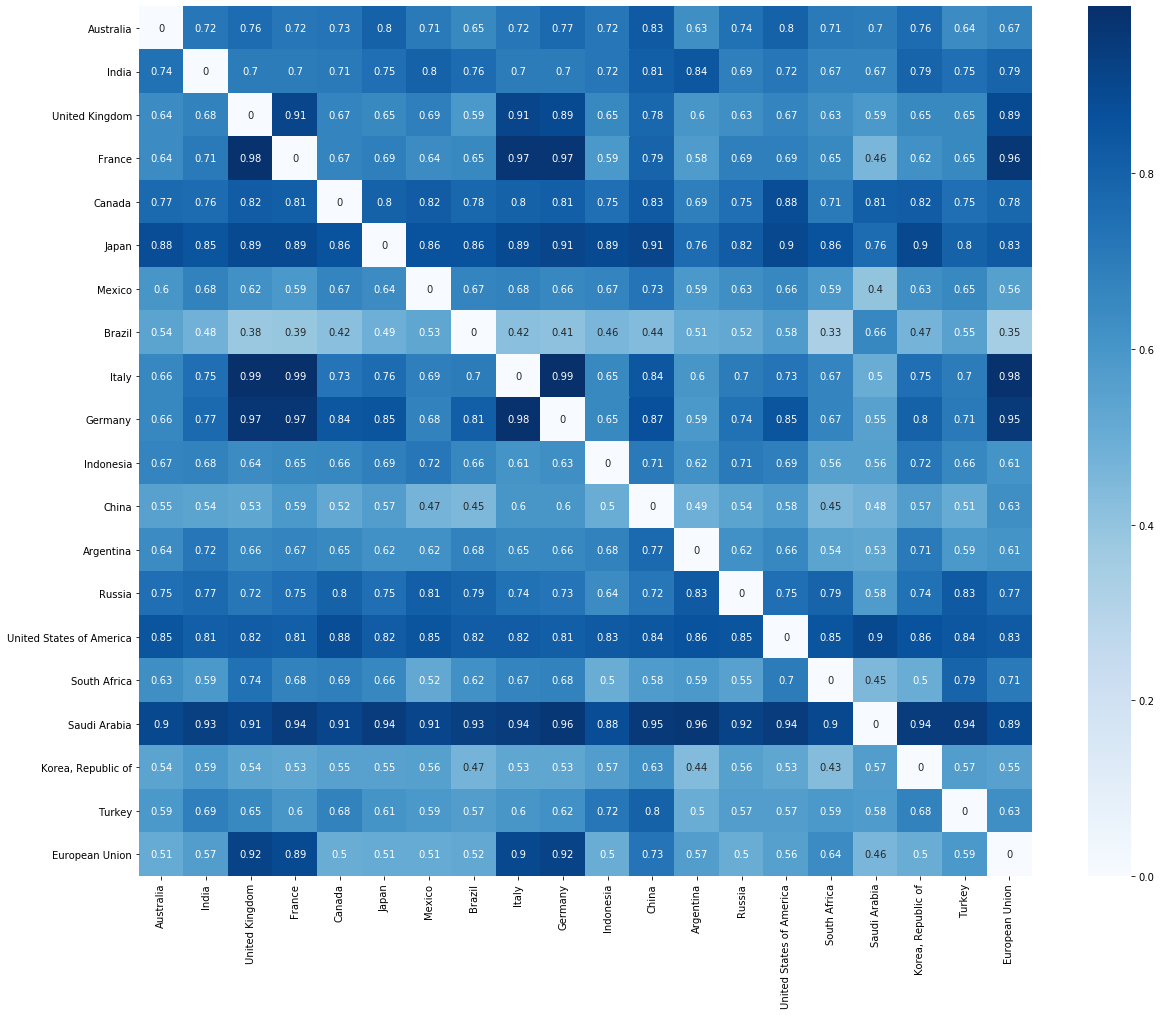

In [38]:
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(matrix_df, annot=True, annot_kws={"size": 10}, cmap="Blues")
ax.set_ylim(len(matrix_df), 0)
plt.show()

We restrict our heat map matrix to the G20, since a key question in our research was to analyse the behavior the G20 themselves against each other after their pledge. As the graph shows above, their behavior has not met their promises made earlier in 2008. Almost all bilateral relations between G20 countries show a more hostile ("red") trade measures. The left side of the graph represents the Implementing Jurisdiction, while the bottom countries listed represent the affected jurisdiction. While no one has been exceptionally open to international trade, there a few that have been quite the opposite. Saudi Arabia, notably, has taken a very significant protectionist stance against all G20 neighbours. Over 90% of the it's trade measures have been denoted as 'red' over the past 10 years. Likewise, the trade measures between some of the major European players have also been stagerring, with over 90% red trade measures taken against their own European counterparts. Not far from that figure is the United States, who has implemented protectionist meatures in at least 80% of cases against each G20 member. With the exception of Brazil, almost all G20 countries have failed to keep there promise.

### Graph 7 : Protectionism World Map

This graph shows a general overview of how protectionist countries have been against the world. We thought it'd be easier to represent this through a world map, and represent a country being more protectionist through a darker shade. The code below shows our process of obtaining the map. We utilize the library geopandas and address the word differences between the two datasets to get the map.

In [39]:
# load the map into a dataframe
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [40]:
df_trade['Intervention_ID'] = df_trade['Intervention ID']

In [41]:
# matching the names in the world DataFrame with those in df_trade
world["name"].replace({"W. Sahara": "Western Sahara",
                                'Dem. Rep. Congo':'Congo, The Democratic Republic of the',
                                 'Dominican Rep.':'Dominican Republic',
                                 'Falkland Is.':'Falkland Islands (Malvinas)',
                                 'Fr. S. Antarctic Lands':'Antarctica',
                                 'Central African Rep.': 'Central African Republic',
                                 'Eq. Guinea':'Equatorial Guinea',
                                 'eSwatini': 'Eswatini',
                                 'Solomon Is.': 'Solomon Islands',
                                 'N. Cyprus': 'Cyprus',
                                 'Bosnia and Herz.':'Bosnia and Herzegovina',
                                 'S. Sudan': 'South Sudan', 'Sudan': 'Republic of the Sudan'
                                }, inplace=True)

In [42]:
drop_gta_df = df_trade.dropna(subset=['GTA_Evaluation'])
yr_df = drop_gta_df[drop_gta_df['GTA_Evaluation'] == "Green"]

In [43]:
# calculate what percentage of measures implemented by a country are protectionist
percent_green = pd.DataFrame(yr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count() / drop_gta_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count())
percent_green['percent_discriminatory'] = 1 - percent_green['Intervention_ID']
percent_green = percent_green.reset_index()
percent_green['name'] = percent_green['Implementing Jurisdiction']

In [44]:
# merge the data in world map with the trade date
world_merge = pd.merge(world, percent_green, on='name', how='inner')

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


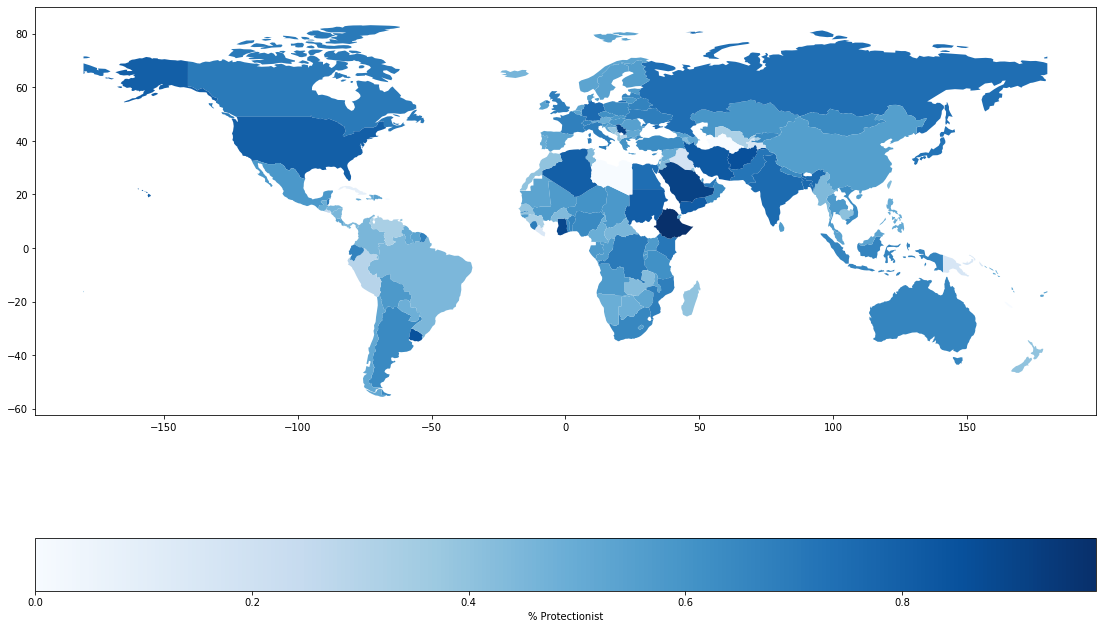

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(19, 15))
world_merge.plot(column='percent_discriminatory', 
                 ax=ax, legend=True, cmap='Blues',
                legend_kwds={'label': "% Protectionist",'orientation': "horizontal"})
plt.show()


This matches to our earlier analysis using the matrix. The United States, Saudi Arabia, and some of the European superpowers stand out as countries which implement the most protectionist trade measures. Interestingly enough, it mostly the G20 countries that have shifted their stance on trade. Other countries outside the G20 seem to have been relatively better, being less active in implementing red trade measures and taking a more balanced approach. Unfortunately, however, the Global Trade Alert did not provide any data on Sudan, so we were unable to get their trade data onto the map.

**Here we are doing manual garbage collecion of our old dataframes. Without this, the kernal crashes when either KNN model is run.**

In [46]:
import gc

del df_trade
del sector_df
del green
del amber
del red
del year_tmes_df
del trade_region
del df_red
del df_green
del y
del df_trade_model
del temp_df
del matrix_df
del world
del percent_green
del yr_df
del drop_gta_df
del world_merge

gc.collect()

df_trade = pd.DataFrame()
sector_df = pd.DataFrame()
green = pd.DataFrame()
amber = pd.DataFrame()
red = pd.DataFrame()
year_tmes_df = pd.DataFrame()
trade_region = pd.DataFrame()
df_red = pd.DataFrame()
df_green = pd.DataFrame()
y = pd.DataFrame()
df_trade_model = pd.DataFrame()
temp_df = pd.DataFrame()
matrix_df = pd.DataFrame()
world = pd.DataFrame()
percent_green = pd.DataFrame()
yr_df = pd.DataFrame()
drop_gta_df = pd.DataFrame()
world_minus = pd.DataFrame()
world_merge = pd.DataFrame()
percent_green_minus = pd.DataFrame()

## 4. Analysis, Hypothesis, and ML

#### Part A: Building a KNN Classifier Model to Determine GTA Evaluation 

After our EDA, we wanted to take our analysis a step further. It was clear that bilateral relationships affect how GTA evaluation changes (higher proportion of reds than the average). Thus, what could thought of useful to potentially build a model that could to predict what GTA evaluation could a trade measure potentially be given an implementing jurisdiction, affecting jurisdiction, as well as a product sector. The code below shows our attempt at building this model. Our first model will run through the entire dataset, which contains a significant number of rows. Additionally we will vectorizing the countries and product sectors, which may lead to longer than expected processing time. 

In [47]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [48]:
gDF['sector_string'] = gDF['Affected Sectors']
gDF["sector_string"] = gDF["sector_string"].apply(make_string)
for sector in sector_string_list:
    gDF[sector] = gDF['sector_string'].str.contains(pat=sector)

In [49]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction']
features.extend(sector_string_list)

In [50]:
gDF_dropped = gDF.dropna(subset=['Implementing Jurisdiction', 'Affected Jurisdiction', 'Affected Sectors', 
                                "GTA_Evaluation"])

In [51]:
y_train_ship = gDF_dropped["GTA_Evaluation"]

X_train_ship = gDF_dropped[features].to_dict(orient="records") 

#categorize the data
vec = DictVectorizer(sparse=False)
vec.fit(X_train_ship)
X_train_ship = vec.transform(X_train_ship)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train_ship)
X_train_sc_ship = scaler.transform(X_train_ship)

# fit the 5-nearest neighbors model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_sc_ship, y_train_ship)

y_train_pred_ship = model.predict(X_train_sc_ship)

In [52]:
# calcualte accuracy score
accuracy_score(y_train_ship, y_train_pred_ship)

0.7790960716403008

Our model is actually able to accurately predict the trade measure evaluation quite well, registering a 0.78 score on the training data. Thus, knowing one's implementing jurisdiction, affected jurisdiction, product sectors can provide as a good predictors on whether a trade measure is discriminatory or liberalising.

In [53]:
# more manual garbage collecion
del gDF_dropped
gc.collect()
gDF_dropped  = pd.DataFrame()

#### Part B: Building a KNN Regressor Model to Determine the Average Duration of a Trade Measure

Our second model looked at how often a trade measure is actually kept between G20 countries. Similar to the earlier model, we utilized Implementing Jurisdiction, Affected Jurisdiction, Sector List, and now the GTA evaluation as well to help predict the duration of a particular trade measure between two countries. The code below shows our attempt at building this second model.

In [54]:
# make sure there are no missing values for our feature and label variables
df_regress = gDF.dropna(subset=['Implementing Jurisdiction', 'Affected Jurisdiction', 'Affected Sectors', 
                                "GTA_Evaluation"])
df_regress = df_regress.dropna(subset=features)
df_regress = df_regress.dropna(subset=['Inception Date', 'Removal Date'])

# days indicates duration of the trade measure in days
df_regress['days'] = df_regress['Removal Date'] - df_regress['Inception Date']
df_regress['days'] = df_regress['days'].dt.total_seconds() / (24.0 * 60.0 * 60.0)

In [55]:
# The data from GTA was a bit messy in the sense that some of the trade measures had inception dates that were after
# removal dates. We decided to drop those rows.
df_regress = df_regress[df_regress["days"] > 0]

In [56]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction', 'GTA_Evaluation']
features.extend(sector_string_list)

In [57]:
X_train_dict_g20 = df_regress[features].to_dict(orient="records")
y_train_g20 = df_regress["days"]

#categorize the data
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict_g20)
X_train_g20 = vec.transform(X_train_dict_g20)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train_g20)
X_train_sc_g20 = scaler.transform(X_train_g20)

from sklearn.neighbors import KNeighborsRegressor

# Fit a 15-nearest neighbors model.
model_g20 = KNeighborsRegressor(n_neighbors=15)
model_g20.fit(X_train_sc_g20, y_train_g20)

# Calculate the model predictions on the training data.
y_train_pred_g20 = model_g20.predict(X_train_sc_g20)
y_train_pred_g20

array([ 380.6       ,  492.86666667,  784.2       , ...,  697.06666667,
       1002.        ,  975.33333333])

In [58]:
# Calculate Mean Squared Error
mse_g20 = ((y_train_g20 - y_train_pred_g20) ** 2).mean()
rmse_g20 = np.sqrt(mse_g20)
rmse_g20

526.4674885609103

Unfortunately, our second model did not show much sucess. The square root of the our model's mean squared error registered at 526 days. This means our model is usually off by about a year and half. We wanted to compare this with the descriptive statistics of days, shown below. While we are below the mean, the score is still quite high. We believe this is largely due to the distribution of the data of days itself, which has a standard deviation also of about 752 days. This indicates that the variation in the data significantly high, and thus predicting the duration of the model may be difficult.

In [59]:
df_regress["days"].describe()

count    42263.000000
mean       773.373684
std        752.157215
min          3.000000
25%        364.000000
50%        699.000000
75%        821.000000
max      10950.000000
Name: days, dtype: float64

### 5. Insight and Policy Decision - Conclusion

Our analysis into the global trade landscape with a close look into G20 revealed a number of things. First, most G20 countries with the exception of a few have turned their back on the promise they made ten years ago on ending protectionism, and building a free and fair trade world. Not only have the G20 countries turned their back on their promise, but they've done so in a fairly conspicuous manner, implementing more protectionist policies against other G20 members than the world in general. This has lead to the turnaround in the trade sentiment over the past ten years. Noticeably, however, this hasn't only been a product of the elevated trade tensions that arose in 2016 with the elections in the United States and the United Kingdom, but rather a continued sentiment exaggerated since the 2008 recession. 

This dataset is useful in understanding the bilateral relationships between G20 members, how their relationships and product sectors sectors can predict potential trade measures and how discriminatory it can be. This is potentially useful for those operating their businesses in particular sectors, and using the bilateral dynamics to understand whether trade measures introduced between the two can be mostly harmful or liberalising. It is never going to be  certain though. As a our final model shows, durations of these implementations vary drastically. Additionally our analysis has shown that in any case, the trade landscape may shift drastically in spite of promises made by some of the largest trading nations, perhaps due to reasons changes in political ideologies and political relations. However, we firmly believe our model can be useful in guiding one through bilateral trade relations and its impact in the 21st Century.